0.005520999908447266 seconds to run Julia default Poisson code 10,000 times.Mean = 99.9013 Standard Deviation = 9.986116891117204

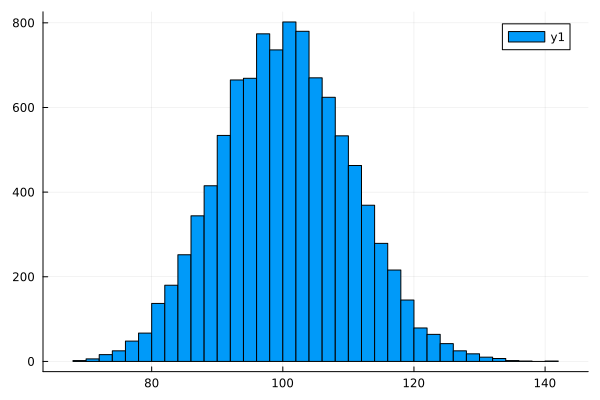

In [2]:
# Function from slide 26, L3

using Random
using Plots
using Statistics

function poisson_rng(lambda)
    k = 0
    p = 1.0
    L = exp(-lambda)
    while p > L
        k += 1
        p *= rand()
    end
    return k-1
end

c = zeros(1000,1)
global x #Julia has some major issues with using variables outside the loop, scope.
x = Nothing
x=zeros(10000,1)
for ii in 1:1000
    a = time()
    for i in 1:10000
        x[i] = poisson_rng(100)
    end
    b = time()
    c[ii]=b-a
end
meanC = mean(c)
meanX = mean(x)
stdX = std(x)
print(meanC, " seconds to run Julia default Poisson code 10,000 times.")
print("Mean = ",meanX," Standard Deviation = ", stdX)

histogram(x)

0.0011710000038146972 seconds to run Julia default Poisson code 10,000 times.Mean = 99.9896 Standard Deviation = 10.017560930321276

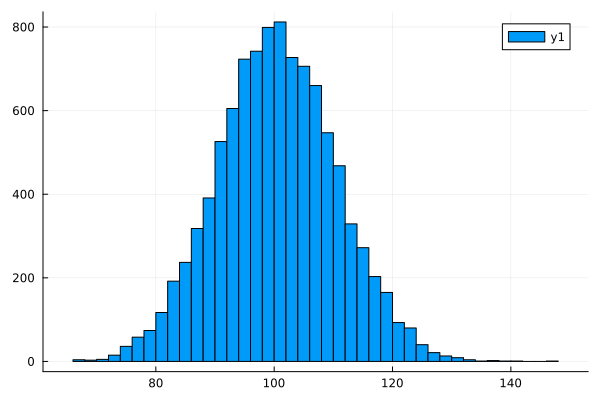

In [3]:
# Function from slide 27, L3
# import Pkg; 
# Pkg.add("StatsKit")
using StatsKit
c = zeros(1000,1)
global x
x = Nothing
for i in 1:1000
    a = time()
    p = Poisson(100)
    x = rand(p,10000)
    b = time()
    c[i]=b-a
end
meanC = mean(c)
meanX = mean(x)
stdX = std(x)
print(meanC, " seconds to run Julia default Poisson code 10,000 times.")
print("Mean = ",meanX," Standard Deviation = ", stdX)

histogram(x)

In [4]:
#combining the gamma and binomial distributions to approximate the Poisson distribution.
# “Numerical Distributions,” in The Art of Computer Programming, Stanford, CA: Computer
# Science Dept. School of Humanities and Sciences, Stanford University, 1976.
# J. H. Ahrens and U. Dieter. "Computer Methods for Sampling from Gamma, Beta, Poisson
# and Binomial Distributions." Computing, vol. 12, pp. 223-246, 1974. Springer-Verlag,
# 1974.
# A. C. Atkinson. "The Computer Generation of Poisson Random Variables." IEE
# Proceedings, vol. 131, no. 4, pp. 362-365, Aug. 1984.

# " Log-Normal-Poisson Algorithm"
#
# When μ is large, we can obtain a method of order log μ by using the fact that
# we know how to handle the gamma and binomial distributions for large orders:
# First generate X with the gamma distribution of order m = ⌊αμ⌋, where α is a
# suitable constant. (Since X is equivalent to − ln(U1 . . . Um), we are essentially
# bypassing m steps of the previous method.) If X < μ, set N ← m + N1, where
# N1 is a Poisson deviate with mean μ − X; and if X ≥ μ, set N ← N1, where
# N1 has the binomial distribution (m − 1, μ/X). This method is due to J. H.
# Ahrens and U. Dieter, whose experiments suggest that 7/8 is a good choice for α.

# import Pkg; 
# Pkg.add("Distributions")
using Distributions
using Statistics
# import Pkg; 
# Pkg.add("StatsPlots")
using StatsPlots #boxplots
using Plots
using StatsKit

function poisson_rng(mu::Float64) #20
    alpha = 0.00000000001 #7/8 over estimates. Choosing a new alpha 
    m = abs(alpha * mu)
    x = rand(Gamma(m, 1.0/mu))
    if x < mu
        n = m+rand(Poisson(mu - x))
    else
        n = rand(Binomial(m - 1, mu/x))
    end
    return n
end
global x 
x = Nothing
c = zeros(1000,1)
for ii in 1:1000
    x=zeros(10000,1)
    a = time()
    for i in 1:10000
        x[i] = poisson_rng(100.0)
    end
    b = time()
    c[ii] = b-a 
end
meanC = mean(c)
print(meanC," seconds to run Log-Normal-Poisson Algorithm 10000 times\n")

meanX = mean(x)
stdX = std(x)
print("Mean = ",meanX," Standard Deviation = ", stdX)
#p1 = histogram(x, label="Experimental",color=:blue, title="Log-Normal-Poisson Algorithm \n n = 10000", xlabel = "x",ylabel = "Frequency")
p2 = boxplot(x, label="Experimental",color=:blue, title="Log-Normal-Poisson Algorithm \n n = 10000")
savefig("Plots1.png")

0.004690000057220459 seconds to run Log-Normal-Poisson Algorithm 10000 times
Mean = 100.07090000099993 Standard Deviation = 10.046798843746235

"c:\\Users\\jesse\\Downloads\\Plots1.png"

10.259299993515015 seconds to run Log-Normal-Poisson Algorithm 10000 times
Mean = 99.6421 Standard Deviation = 7.026844615083249

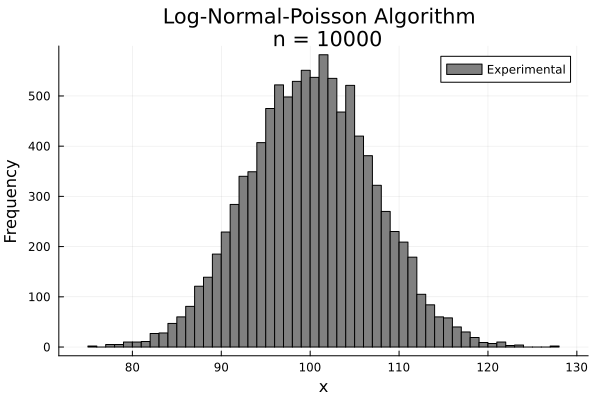

In [5]:
#22. [HM40 ] Can the exact Poisson distribution for large μ be obtained by generating
# an appropriate normal deviate, converting it to an integer in some convenient way, and
# applying a (possibly complicated) correction a small percent of the time?

# http://www.it.uom.gr/teaching/linearalgebra/NumericalRecipiesInC/c7-3.pdf 

using Distributions
using Plots
function poisson_approx(mu::Float64) #Julia sensitive to data types
    normal = Normal(mu, sqrt(mu)) #normal distribution, mean mu and variance sqrt(mu)
    while true #infinity
        xxx = rand(normal) #gen random, keep going until x greater than 0.
        if xxx >= 0
            k = convert(Int64, floor(xxx)) #necessary to avoid error in factorial
            u = rand()
            if log(u) <= -(xxx - k) + k * log(mu) - mu - log(factorial(big(k))) #comparison, acceptance/rejection, note need big() or else fails factorial for some cursed reason.
                #if statement == SLOW
                return k
            end
        end
    end
 end
poisson_approx(100.0)
global x
x = Nothing
c = zeros(10,1)
for ii in 1:10
    x = zeros(10000,1)
    a = time()
    for i in 1:10000
        x[i] = poisson_approx(100.0)
    end
    b = time()
    c[ii] = b-a
end
meanC = mean(c)
print(meanC," seconds to run Log-Normal-Poisson Algorithm 10000 times\n")
meanX = mean(x)
stdX = std(x)
print("Mean = ",meanX," Standard Deviation = ", stdX)
p1 = histogram(x, label="Experimental",color=:gray, title="Log-Normal-Poisson Algorithm \n n = 10000", xlabel = "x",ylabel = "Frequency")
#p2 = boxplot(x, label="Experimental",color=:gray, title="Log-Normal-Poisson Algorithm \n n = 10000")